# Project7_The Oscars
- Use visualization tools to profile the PGA Tour player
***

In [1]:
import numpy as np
import pandas as pd

general = pd.read_csv('../data/pgaTourData.csv')
tech = pd.read_csv('../data/PGATOUR_data2.csv')

In [2]:
general.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [3]:
tech.head()

,Player,EVENTS_PLAYED,POINTS,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,POINTS_BEHIND_LEAD,ROUNDS_PLAYED,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,MEASURED_ROUNDS,...,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,TOTAL_ROUNDS,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE
0,Aaron Baddeley,27.0,342.0,0.0,1.0,5275.0,84.0,-0.062,-4.064,66.0,...,278.2,312.6,237.1,70.850,5518.0,78.0,16.24,228.0,1404.0,37.0
1,Aaron Wise,27.0,1498.0,1.0,4.0,4119.0,82.0,0.245,17.134,70.0,...,282.5,314.6,255.7,70.276,5888.0,84.0,16.53,250.0,1512.0,22.0
2,Abraham Ancer,29.0,909.0,0.0,5.0,4708.0,94.0,-0.052,-4.076,79.0,...,275.1,305.8,223.5,70.659,6745.0,96.0,14.76,255.0,1728.0,27.0
3,Adam Hadwin,24.0,1054.0,0.0,3.0,4563.0,88.0,0.145,8.729,60.0,...,277.7,307.7,246.9,70.750,6280.0,89.0,15.61,250.0,1602.0,30.0
4,Adam Schenk,28.0,239.0,0.0,1.0,5378.0,86.0,0.130,8.558,66.0,...,283.0,305.0,236.8,71.370,5683.0,80.0,16.88,243.0,1440.0,26.0


## 0. Feature Engineering
- Fill all the NaN values with 0.0, which is reasonable enough since "NaN" in features such as wins means no winning history.
- Converting obeject type to numerical type
***

In [4]:
general = general[general.Rounds.notnull()]
general = general.fillna(0.0)
general['Money'] = general['Money'].replace('[$]', '', regex=True).replace('[,]', '', regex=True).astype(float)
general['Points'] = general['Points'].replace('[,]', '', regex=True).astype(float)
general['Wins'] = general['Wins'].astype(int)
general.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868.0,0,5.0,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,1,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020.0,0,3.0,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795.0,0,5.0,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421.0,0,3.0,0.164,0.062,-0.227,0.099,0.026,1089763.0


In [5]:
tech = tech[tech.EVENTS_PLAYED.notnull()]
tech = tech.fillna(0.0)
tech['FAIRWAYS_HIT'] = tech['FAIRWAYS_HIT'].replace('[,]', '', regex=True).astype(float)
tech['TOTAL_DRIVES'] = tech['TOTAL_DRIVES'].replace('[,]', '', regex=True).astype(float)
tech.head()

,Player,EVENTS_PLAYED,POINTS,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,POINTS_BEHIND_LEAD,ROUNDS_PLAYED,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,MEASURED_ROUNDS,...,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,TOTAL_ROUNDS,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE
0,Aaron Baddeley,27.0,342.0,0.0,1.0,5275.0,84.0,-0.062,-4.064,66.0,...,278.2,312.6,237.1,70.850,5518.0,78.0,16.24,228.0,1404.0,37.0
1,Aaron Wise,27.0,1498.0,1.0,4.0,4119.0,82.0,0.245,17.134,70.0,...,282.5,314.6,255.7,70.276,5888.0,84.0,16.53,250.0,1512.0,22.0
2,Abraham Ancer,29.0,909.0,0.0,5.0,4708.0,94.0,-0.052,-4.076,79.0,...,275.1,305.8,223.5,70.659,6745.0,96.0,14.76,255.0,1728.0,27.0
3,Adam Hadwin,24.0,1054.0,0.0,3.0,4563.0,88.0,0.145,8.729,60.0,...,277.7,307.7,246.9,70.750,6280.0,89.0,15.61,250.0,1602.0,30.0
4,Adam Schenk,28.0,239.0,0.0,1.0,5378.0,86.0,0.130,8.558,66.0,...,283.0,305.0,236.8,71.370,5683.0,80.0,16.88,243.0,1440.0,26.0


- Finding the best player based on the points they earned on the tour for future comparison

In [6]:
bestPlayer = tech.loc[tech["POINTS_BEHIND_LEAD"] == 0.0]
bestPlayer

,Player,EVENTS_PLAYED,POINTS,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,POINTS_BEHIND_LEAD,ROUNDS_PLAYED,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,MEASURED_ROUNDS,...,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,TOTAL_ROUNDS,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE
32,Bryson DeChambeau,24.0,5617.0,3.0,9.0,0.0,85.0,0.326,21.533,66.0,...,293.3,326.7,251.3,69.624,6194.0,89.0,14.73,236.0,1602.0,24.0


## Visualizations
- Library used: Matplotlib, Seaborn, Bokeh

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
import copy
import math

### 1. All Players'  Information
- Finding the distribution in each category to get a picture of how majority of the players perform on the tour

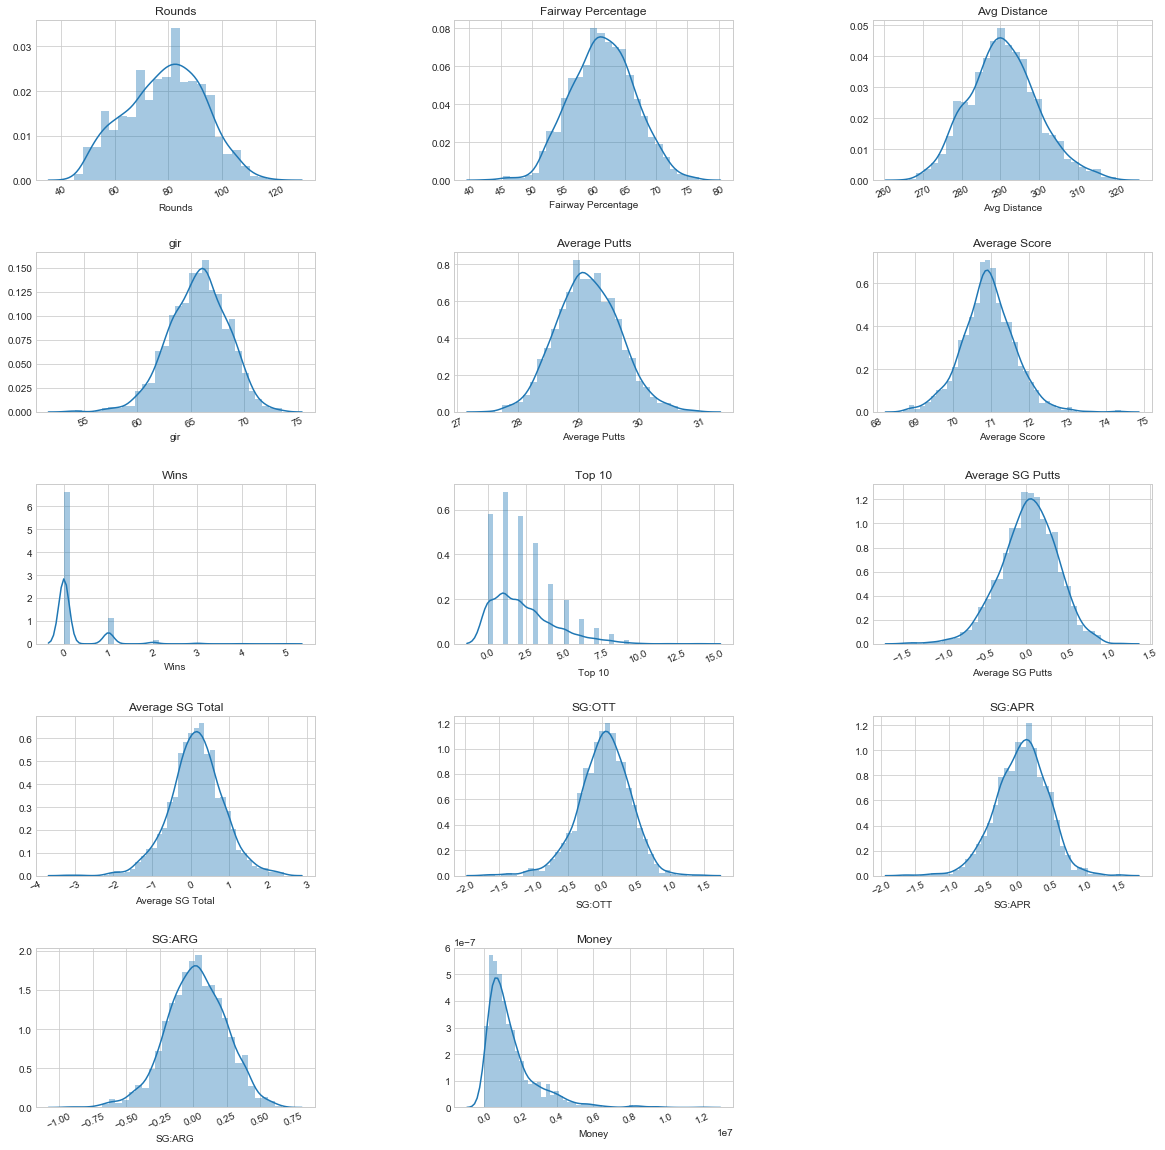

In [8]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = wspace, hspace = hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
            
data = copy.deepcopy(general)
data.drop(columns = ['Player Name', 'Year', 'Average Scrambling', 'Points'], inplace = True)
plot_distribution(data, cols = 3, width = 20, height = 20, hspace = 0.45, wspace = 0.5)

## 2. Individuals 
- Created a function that would:
    - Print out each value of the features I chose
    - Barplot those values together with the mean value from all players and the value from the best player as a comparison
        - Note that since the driving distances has a larger value than others, they are plotted in a separete graph
    - Plot several general data including 1. Scorec 2. Top 10s, 3. Wins  4.Money to show how the player did overall on the tour

- Picked out some very useful categories that a golfer cares about based on my experience as a golfer 
- Find mean value of those features from all players

In [9]:
tech_sim = pd.DataFrame(tech, columns = ['Player','SG_PUTTING_PER_ROUND', 'AVG_Driving_DISTANCE', 'UP_AND_DOWN_%', 
                                         'FAIRWAY_HIT_%', 'SAND_SAVE%', 'Three_PUTT%', 'SG_PER_ROUND', 
                                         'ROUGH_TENDNECY%', 'FAIRWAY_BUNKER%', 'AVG_CARRY_DISTANCE', 'AVG_SCORE',
                                         'MAKES_BOGEY%'])
tech_sim.loc['195'] = tech_sim.mean(axis = 0)
tech_sim.iloc[195, 0] = "Mean"

- Find the value of those features from the best player

In [10]:
bestPlayer_tech = tech_sim.loc[tech_sim['Player'] == 'Bryson DeChambeau']

- Here defines the function

In [11]:
def findDataFor(name):
    genData = general.loc[general['Player Name'] == name]
    techData = tech_sim.loc[tech_sim['Player'] == name]
    meanData = tech_sim.loc[tech_sim['Player'] == "Mean"]
    
    print("Name: ", name)
    if techData.empty == False:
        print("Technical Information: ")
        print("Average Score: ", techData['AVG_SCORE'].mean())
        print("Stroke Gained per Round: ", techData['SG_PER_ROUND'].mean())
        print("Average Driving Distance: ", techData['AVG_Driving_DISTANCE'].mean())
        print("Average Carry Distance: ", techData['AVG_CARRY_DISTANCE'].mean())
        print("Fairway Hit: ", techData['FAIRWAY_HIT_%'].mean(), "%")
        print("Rough Tendency: ", techData['ROUGH_TENDNECY%'].mean(), "%")
        print("Fairway Bunker: ", techData['FAIRWAY_BUNKER%'].mean(), "%")
        print("Sand Save:", techData['SAND_SAVE%'].mean(), "%")
        print("Stroke Gained Putting per Round: ", techData['SG_PUTTING_PER_ROUND'].mean())
        print("3-Putt: ", techData['Three_PUTT%'].mean(), "%")
        print("Up & Down: ", techData['UP_AND_DOWN_%'].mean(), "%")
        
        output_notebook()

        Categories = ['sgPutting', 'up&Down%','fairway%', 
                      'sandSave%', '3-putt%', 'sg', 'rough%', 'fwBunker%', 
                      'avgScore', 'bogey%']
        Players = [name, 'Bryson_D', 'Mean']
        
        techData2 = copy.deepcopy(techData)
        techData2.drop(columns = ['Player','AVG_Driving_DISTANCE', 'AVG_CARRY_DISTANCE'], inplace = True)
        bestPlayer2 = copy.deepcopy(bestPlayer_tech)
        bestPlayer2.drop(columns = ['Player','AVG_Driving_DISTANCE', 'AVG_CARRY_DISTANCE'], inplace = True)
        meanData2 = copy.deepcopy(meanData)
        meanData2.drop(columns = ['Player','AVG_Driving_DISTANCE', 'AVG_CARRY_DISTANCE'], inplace = True)

        data = {'Categories' : Categories,
                name : techData2.values.tolist()[0],
                'Bryson DeChambeau' : bestPlayer2.values.tolist()[0],
                'Mean'  : meanData2.values.tolist()[0]}

        x = [ (category, player) for category in Categories for player in Players ]
        counts = sum(zip(data[name], data['Bryson DeChambeau'], data['Mean']), ()) 

        source = ColumnDataSource(data = dict(x = x, counts = counts))

        p = figure(x_range = FactorRange(*x), plot_height = 400, plot_width = 1200, title = "Data Comparison",
                   toolbar_location = None, tools = "")

        p.vbar(x = 'x', top = 'counts', width = 0.9, source = source)

        p.y_range.start = 0
        p.x_range.range_padding = 0.1
        p.xaxis.major_label_orientation = math.pi/2
        p.xgrid.grid_line_color = None

        show(p)
        
        Categories = ['avgDrivingDist', 'avgCarryDist', 'avgScore']
        Players = [name, 'Bryson_D', 'Mean']
        
        techData3 = copy.deepcopy(techData)
        techData3.drop(columns = ['Player','SG_PUTTING_PER_ROUND', 'UP_AND_DOWN_%', 
                                  'FAIRWAY_HIT_%', 'SAND_SAVE%', 'Three_PUTT%', 'SG_PER_ROUND', 
                                  'ROUGH_TENDNECY%', 'FAIRWAY_BUNKER%','MAKES_BOGEY%'], inplace = True)
        bestPlayer3 = copy.deepcopy(bestPlayer_tech)
        bestPlayer3.drop(columns = ['Player','SG_PUTTING_PER_ROUND', 'UP_AND_DOWN_%', 
                                  'FAIRWAY_HIT_%', 'SAND_SAVE%', 'Three_PUTT%', 'SG_PER_ROUND', 
                                  'ROUGH_TENDNECY%', 'FAIRWAY_BUNKER%','MAKES_BOGEY%'], inplace = True)
        meanData3 = copy.deepcopy(meanData)
        meanData3.drop(columns = ['Player','SG_PUTTING_PER_ROUND', 'UP_AND_DOWN_%', 
                                  'FAIRWAY_HIT_%', 'SAND_SAVE%', 'Three_PUTT%', 'SG_PER_ROUND', 
                                  'ROUGH_TENDNECY%', 'FAIRWAY_BUNKER%','MAKES_BOGEY%'], inplace = True)

        data = {'Categories' : Categories,
                name : techData3.values.tolist()[0],
                'Bryson DeChambeau' : bestPlayer3.values.tolist()[0],
                'Mean'  : meanData3.values.tolist()[0]}

        x = [ (category, player) for category in Categories for player in Players ]
        counts = sum(zip(data[name], data['Bryson DeChambeau'], data['Mean']), ()) 

        source = ColumnDataSource(data = dict(x = x, counts = counts))

        q = figure(x_range = FactorRange(*x), plot_height = 400, plot_width = 600, title = "Data Comparison: Driving",
                   toolbar_location = None, tools = "")

        q.vbar(x = 'x', top = 'counts', width = 0.9, source = source)

        q.y_range.start = 0
        q.x_range.range_padding = 0.1
        q.xaxis.major_label_orientation = math.pi/2
        q.xgrid.grid_line_color = None
        
        show(q)
        
    if genData.empty == False:
        print("General Information: ")
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure(figsize = (20, 20))

        plt.subplot(221)  
        plt.title('Average Score VS. Year')
        sns.lineplot(x = "Year", y = "Average Score", data = genData)

        plt.subplot(222)
        plt.title('Tops 10s VS. Year')
        sns.barplot(x = "Year", y = "Top 10", data = genData)

        plt.subplot(223)
        plt.title('Wins VS. Year')
        sns.barplot(x = "Year", y = "Wins", data = genData)

        plt.subplot(224)
        plt.title('Average Score VS. Money')
        sns.barplot(x = "Average Score", y = "Money", hue = "Year", data = genData)


- Applying the function to two of my favourite players

Name:  Jordan Spieth
Technical Information: 
Average Score:  69.904
Stroke Gained per Round:  1.016
Average Driving Distance:  299.9
Average Carry Distance:  279.6
Fairway Hit:  61.02 %
Rough Tendency:  28.22 %
Fairway Bunker:  6.0 %
Sand Save: 53.27 %
Stroke Gained Putting per Round:  -0.031
3-Putt:  3.07 %
Up & Down:  63.2 %


Loading BokehJS ...

General Information: 


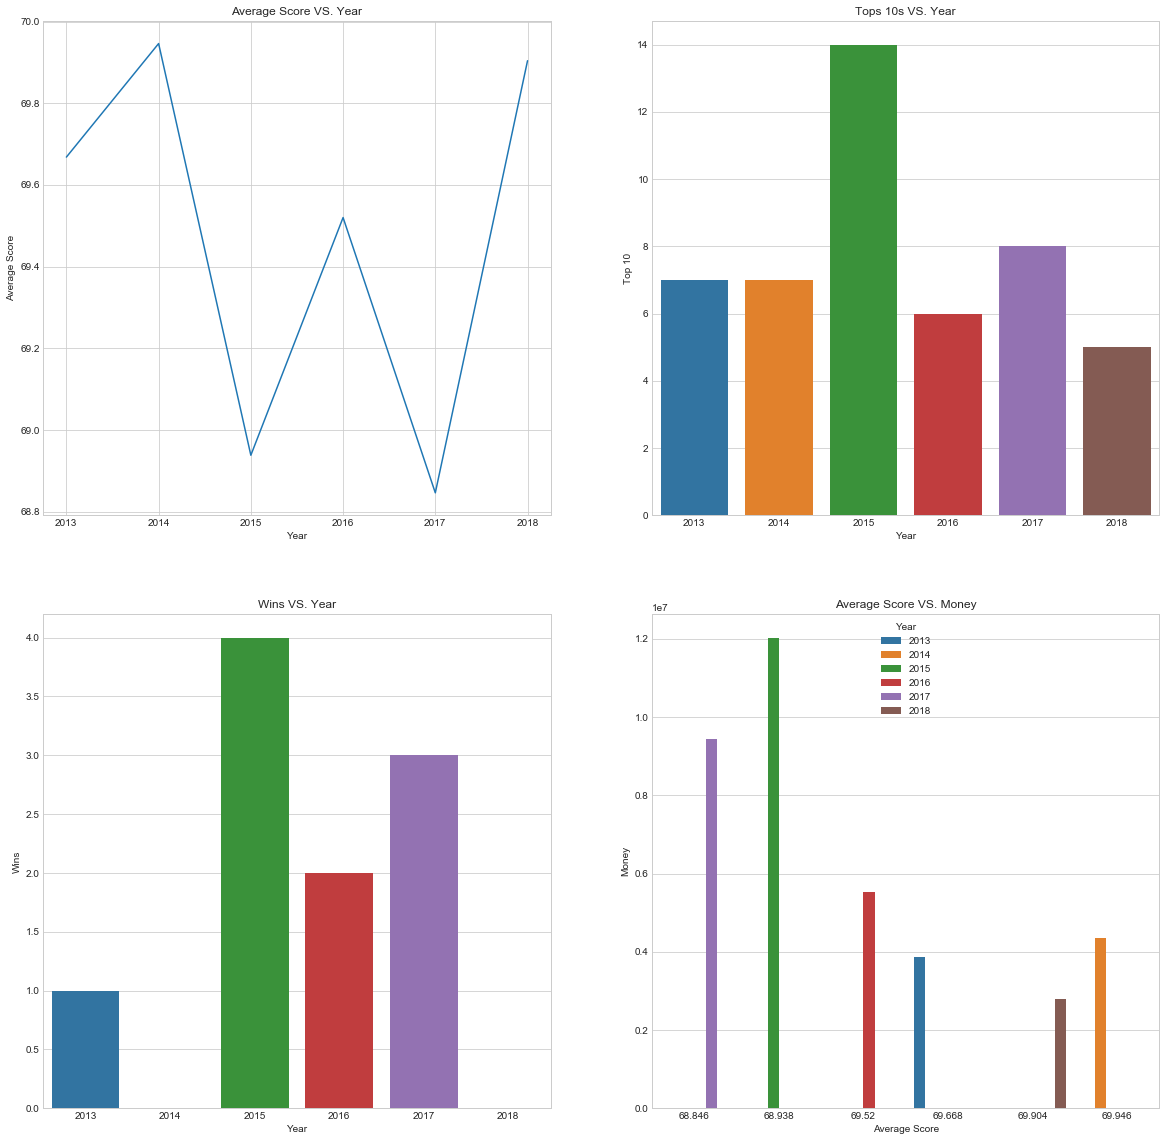

In [12]:
findDataFor("Jordan Spieth")

Name:  Rickie Fowler
Technical Information: 
Average Score:  69.452
Stroke Gained per Round:  1.005
Average Driving Distance:  301.1
Average Carry Distance:  290.3
Fairway Hit:  63.81 %
Rough Tendency:  26.29 %
Fairway Bunker:  5.4 %
Sand Save: 59.8 %
Stroke Gained Putting per Round:  0.22399999999999998
3-Putt:  2.06 %
Up & Down:  64.31 %


Loading BokehJS ...

General Information: 


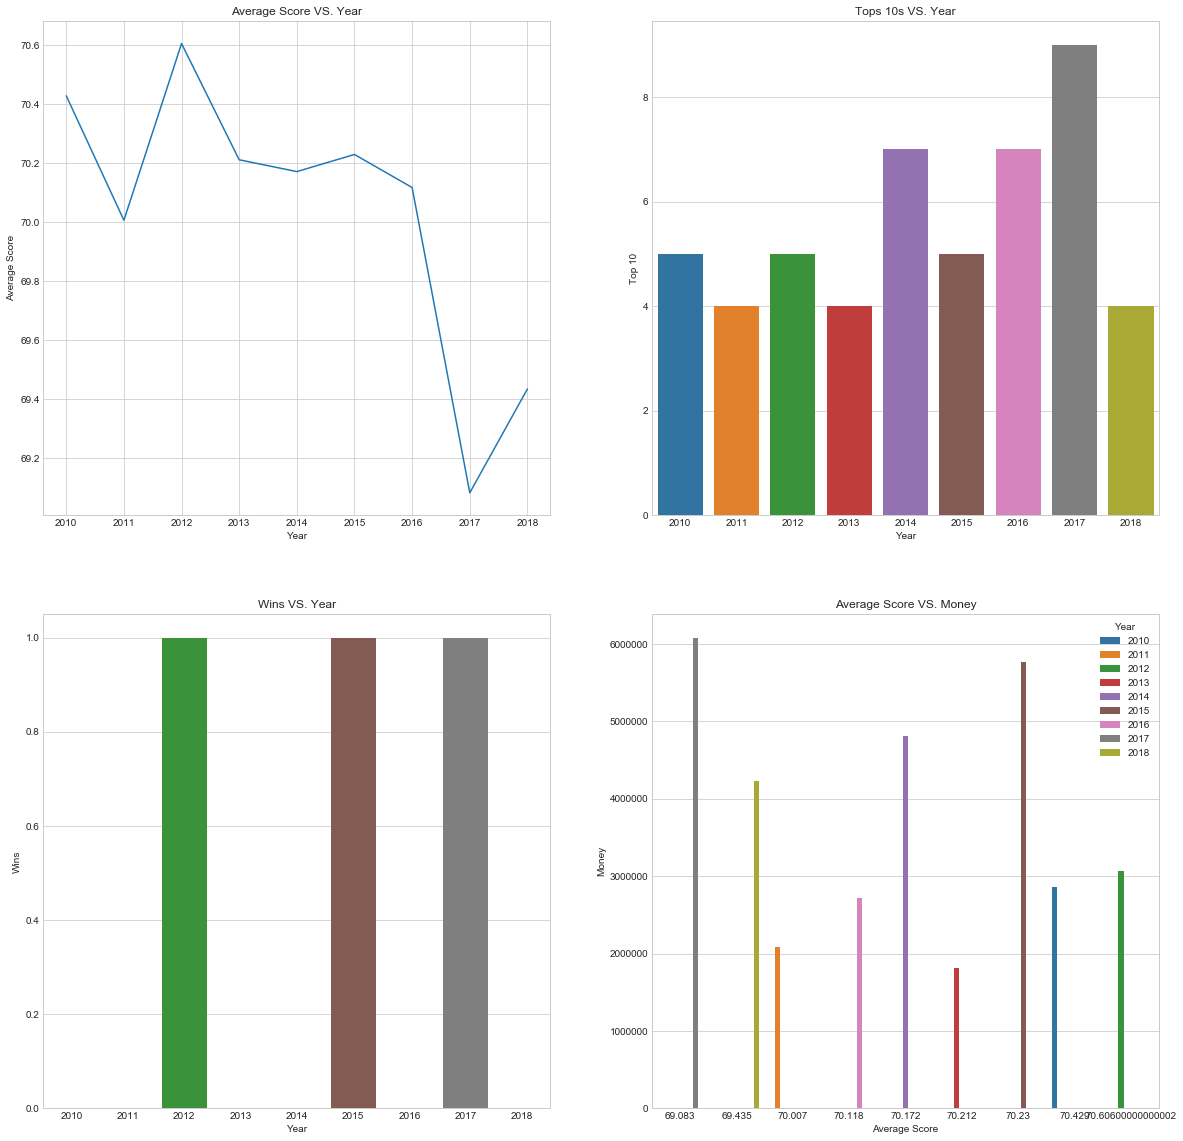

In [13]:
findDataFor("Rickie Fowler")